In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np
import statistics as st
import math
from tabulate import tabulate

In [2]:
df = pd.read_csv("bank_data.csv")
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,816,28,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,15476,117,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,8764,69,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,10291,60,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,8395,62,0.000


In [3]:
a= df.select_dtypes(exclude='object')

In [4]:
b= df.select_dtypes(include='object')

In [5]:
a_lst=list(a.columns)

In [6]:
b_lst=list(b.columns)

In [7]:
table= [b_lst,a_lst]

print(tabulate({"Categorical":b_lst,
               "continuous":a_lst},headers=["categorical","continuous"]))

categorical      continuous
---------------  ------------------------
Attrition_Flag   CLIENTNUM
Gender           Customer_Age
Education_Level  Dependent_count
Marital_Status   Months_on_book
Income_Category  Total_Relationship_Count
Card_Category    Months_Inactive_12_mon
                 Contacts_Count_12_mon
                 Credit_Limit
                 Total_Revolving_Bal
                 Avg_Open_To_Buy
                 Total_Trans_Amt
                 Total_Trans_Ct
                 Avg_Utilization_Ratio


### T1 card cat wise analysis of cust's - high school passouts

In [8]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {df[col].unique()}") # unique: returns the unique values in the col
    print(f"Mode of {col} is {df[col].mode()[0]}")  # mode: returns the mode of the column
    print(f"Number of missing values in {col} is {df[col].isnull().sum()}") # isnull().sum() counts the number of null in dataframe
    if df[col].isnull().sum() > 0:  #` check if null values are present
        print(f"\nThere are null values in the {col} column")

In [9]:
info_of_cat("Card_Category")

Unique values in Card_Category are: ['Blue' 'Gold' 'Silver' nan 'Platinum']
Mode of Card_Category is Blue
Number of missing values in Card_Category is 132

There are null values in the Card_Category column


In [10]:
card_mode = df.Card_Category.mode()[0]
print(card_mode)
df["Card_Category"].fillna(card_mode, inplace = True)

Blue


Blue        9447
Silver       544
Gold         116
Platinum      20
Name: Card_Category, dtype: int64


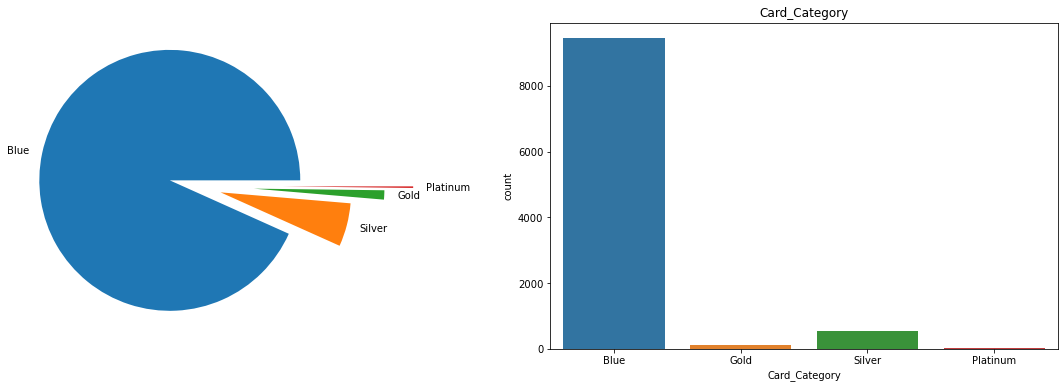

In [11]:
data = df["Card_Category"].value_counts()                                   #value count is counting the number of values in the column
print(data)
pie, ax = plt.subplots(1, 2, figsize = [20,6])
labels =data.keys()                                                         # Keys returning you the index names in the data
ax[0].pie(x = data, explode = [0.2, 0.2, 0.45, 0.67], labels = labels)         # pctdistance is the distance between the percentage on pie chart from center.
                                                                                #  explode is to split the slices by the distance provided
sb.countplot(x = df["Card_Category"], ax = ax[1])                                                                                               
plt.title("Card_Category")                                                  # title is used to prints the title on the image. 
plt.show()

### Majority of Customers use Blue card and the Least used is Platinum card

In [12]:
cc= df.loc[df['Education_Level'] == 'High School']
cc

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,2,2,2,29081.0,1396,27685.0,1538,36,0.048
18,806160108,Existing Customer,61,M,1,High School,Married,$40K - $60K,Blue,56,2,2,3,3193.0,2517,676.0,1336,30,0.788
22,784725333,Existing Customer,41,M,3,High School,Married,$40K - $60K,Blue,33,4,2,1,4470.0,680,3790.0,931,18,0.152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10105,709646433,Attrited Customer,59,F,1,High School,Married,Less than $40K,Blue,50,1,4,3,5043.0,743,4300.0,10170,66,0.147
10109,780613758,Existing Customer,47,M,5,High School,Single,Less than $40K,Blue,35,4,3,5,4165.0,0,4165.0,17093,111,0.000
10113,713733633,Attrited Customer,27,M,0,High School,Divorced,$60K - $80K,Blue,36,2,3,2,13303.0,2517,10786.0,10219,85,0.189
10120,710841183,Existing Customer,54,M,1,High School,Single,$60K - $80K,Blue,34,5,2,0,13940.0,2109,11831.0,15577,114,0.151


In [13]:
ca= cc.loc[cc['Attrition_Flag'] == 'Existing Customer']
ca

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,2,2,2,29081.0,1396,27685.0,1538,36,0.048
18,806160108,Existing Customer,61,M,1,High School,Married,$40K - $60K,Blue,56,2,2,3,3193.0,2517,676.0,1336,30,0.788
22,784725333,Existing Customer,41,M,3,High School,Married,$40K - $60K,Blue,33,4,2,1,4470.0,680,3790.0,931,18,0.152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10091,719106783,Existing Customer,52,M,1,High School,Single,$80K - $120K,Blue,41,4,1,4,4103.0,1972,2131.0,16344,118,0.481
10093,719574033,Existing Customer,38,M,1,High School,Single,$60K - $80K,Blue,28,2,2,2,21906.0,0,21906.0,15349,119,0.000
10097,801036033,Existing Customer,31,M,0,High School,Single,$40K - $60K,Blue,25,3,2,3,4493.0,1388,3105.0,17744,104,0.309
10109,780613758,Existing Customer,47,M,5,High School,Single,Less than $40K,Blue,35,4,3,5,4165.0,0,4165.0,17093,111,0.000


In [14]:
cb= cc.loc[cc['Attrition_Flag'] == 'Attrited Customer']
cb

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
140,789322833,Attrited Customer,48,F,5,High School,Married,Less than $40K,Blue,38,1,3,3,8025.0,0,8025.0,673,18,0.000
198,708868233,Attrited Customer,213,M,0,High School,Married,Less than $40K,Blue,52,1,3,2,1438.3,900,538.3,760,21,0.626
247,712125258,Attrited Customer,46,M,4,High School,Married,$120K +,Blue,30,3,3,3,2442.0,0,2442.0,701,19,0.000
253,772390908,Attrited Customer,59,M,0,High School,Single,$40K - $60K,Blue,48,2,4,3,3616.0,1054,2562.0,687,17,0.291
268,771809733,Attrited Customer,64,F,0,High School,Married,$40K - $60K,Blue,53,1,3,3,3353.0,0,3353.0,960,18,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10065,709865883,Attrited Customer,38,M,2,High School,Divorced,$60K - $80K,Silver,25,1,2,3,26794.0,821,25973.0,8788,58,0.031
10103,717185658,Attrited Customer,51,M,1,High School,Married,$80K - $120K,Blue,36,4,3,4,22754.0,0,22754.0,8531,77,0.000
10105,709646433,Attrited Customer,59,F,1,High School,Married,Less than $40K,Blue,50,1,4,3,5043.0,743,4300.0,10170,66,0.147
10113,713733633,Attrited Customer,27,M,0,High School,Divorced,$60K - $80K,Blue,36,2,3,2,13303.0,2517,10786.0,10219,85,0.189


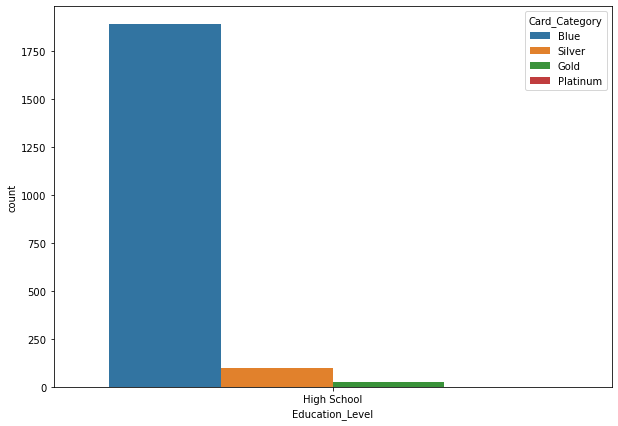

In [15]:
fig, ax = plt.subplots(figsize = (10, 7))
sb.countplot(x = "Education_Level", hue = "Card_Category", data = cc)
plt.show()

### T2 Income cat wise cust's who are high school passout

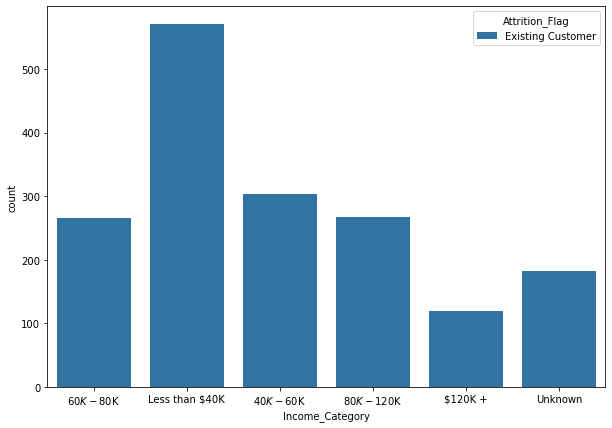

In [16]:
fig, ax = plt.subplots(figsize = (10, 7))
sb.countplot(x = "Income_Category", hue = "Attrition_Flag", data = ca)
plt.show()

### Interpretation: We can conclude from the above graph that people earning less than 40k are the highest no of customers who are still with the bank followed by the 40k-60k category

### T3 Details of Total Transaction Amount of existing customers who are high school pass outs.

In [17]:
t_data = cc["Total_Trans_Amt"].sum()
t_data

8864729

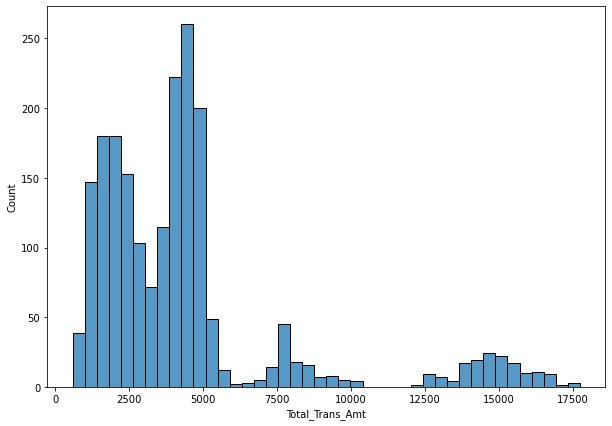

In [18]:
fig, ax = plt.subplots(figsize = (10, 7))
sb.histplot(x = "Total_Trans_Amt", data = cc)
plt.show()

### Interpretation: Highest Transaction amount is between approx 3000 to 5000

### T4 Analysis of the education level of the customers who are with the bank and those who left

In [19]:
cd= df.loc[df['Attrition_Flag'] == 'Existing Customer']

In [20]:
ce= df.loc[df['Attrition_Flag'] == 'Attrited Customer']
ce

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
21,708508758,Attrited Customer,62,F,0,Graduate,Married,Less than $40K,Blue,49,2,3,3,1438.3,0,1438.3,692,16,0.000
39,708300483,Attrited Customer,66,F,0,Doctorate,Married,Unknown,Blue,56,5,4,3,7882.0,605,7277.0,704,16,0.077
51,779471883,Attrited Customer,54,F,1,Graduate,Married,Less than $40K,Blue,40,2,3,1,1438.3,808,630.3,705,19,0.562
54,714374133,Attrited Customer,56,M,2,Graduate,Married,$120K +,Blue,36,1,3,3,15769.0,0,15769.0,602,15,0.000
61,712030833,Attrited Customer,48,M,2,Graduate,Married,$60K - $80K,Silver,35,2,4,4,34516.0,0,34516.0,691,15,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10119,716893683,Attrited Customer,55,F,3,Uneducated,Single,Unknown,Blue,47,4,3,3,14657.0,2517,12140.0,6009,53,0.172
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,8764,69,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,10291,60,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,8395,62,0.000


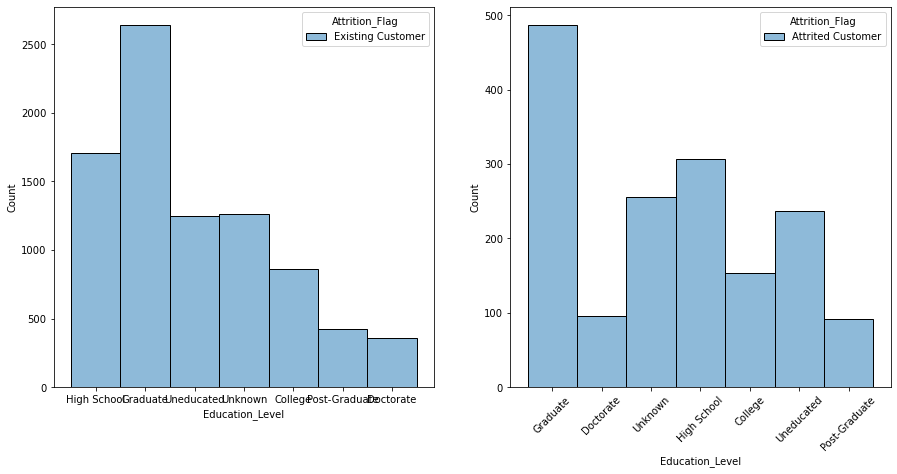

In [21]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sb.histplot(x = cd["Education_Level"], hue = cd["Attrition_Flag"], ax = ax[0])
plt.xticks(rotation=45)
sb.histplot(x = ce["Education_Level"], hue = ce["Attrition_Flag"], ax = ax[1])

plt.show()

### Interpretation: The majority of attrited customers are Graduates and the least are Doctorates. The highest no of existing customers are also Graduates and the least are Doctorates, Considering the highest and lowest are graduates and Doctorates respectively

### T5 Analysis of Transaction Amount (mean, median, and mode) made by the existing customers and comparing it with those who are not existing


In [22]:
def info_of_numerical_e(col):
    print(f"The mean of the {col} is {cd[col].mean()}")
    print(f"The median of the {col} is {cd[col].median()}")
    print(f"The mode of the {col} is {cd[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {cd[col].std()}")
    print(f"Number of missing values in the {col} is {cd[col].isnull().sum()}")

## Existing

In [23]:
a=info_of_numerical_e("Total_Trans_Amt")

The mean of the Total_Trans_Amt is 4654.655882352941
The median of the Total_Trans_Amt is 4100.0
The mode of the Total_Trans_Amt is 4253
The standard deviation of the Total_Trans_Amt is 3512.7726346617
Number of missing values in the Total_Trans_Amt is 0


In [24]:
def info_of_numerical_a(col):
    print(f"The mean of the {col} is {ce[col].mean()}")
    print(f"The median of the {col} is {ce[col].median()}")
    print(f"The mode of the {col} is {ce[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {ce[col].std()}")
    print(f"Number of missing values in the {col} is {ce[col].isnull().sum()}")

## Attrited

In [25]:
b= info_of_numerical_a("Total_Trans_Amt")

The mean of the Total_Trans_Amt is 3095.025814382299
The median of the Total_Trans_Amt is 2329.0
The mode of the Total_Trans_Amt is 2108
The standard deviation of the Total_Trans_Amt is 2308.2276285737216
Number of missing values in the Total_Trans_Amt is 0


### interpretation: We can interpret from the above values that the no of attrited customers is less when compared to the existing customers.

### T6 average utilization ratio of the existing customers?

In [26]:
info_of_numerical_e('Avg_Utilization_Ratio')

The mean of the Avg_Utilization_Ratio is 0.2964117647058822
The median of the Avg_Utilization_Ratio is 0.211
The mode of the Avg_Utilization_Ratio is 0.0
The standard deviation of the Avg_Utilization_Ratio is 0.27256781304868866
Number of missing values in the Avg_Utilization_Ratio is 0


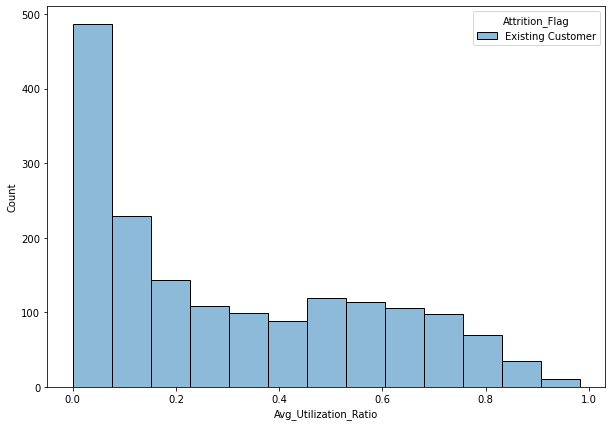

In [27]:
fig, ax = plt.subplots(figsize = (10, 7))
sb.histplot(x = "Avg_Utilization_Ratio", hue = "Attrition_Flag", data = ca)
plt.show()

### The average utilization is between 0.1 and 0.2 for the majority of customers as seen in the above graph 

### T7 Analysis of the churned out customers who hold the blue card with respect to their income categories

In [28]:
gf7=df[(df['Card_Category']=='Blue') & (df['Attrition_Flag']=='Attrited Customer')]

<AxesSubplot:xlabel='Income_Category', ylabel='Count'>

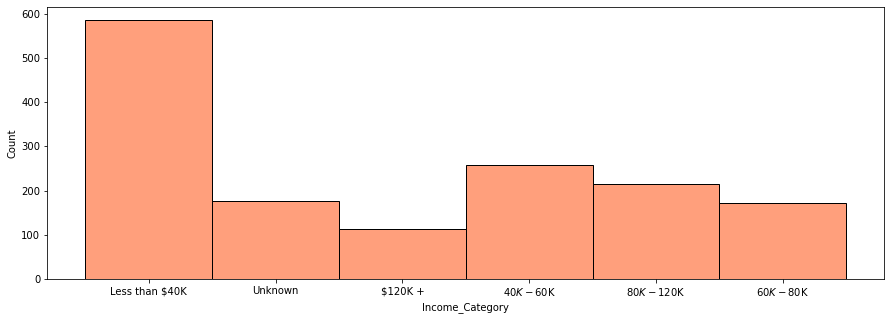

In [29]:
plt.figure(figsize=(15,5))
sb.histplot(x=gf7['Income_Category'],bins=120, color = "coral")

### The maximum no of customers who own a Blue card have income of less than 40k

### T8 Analysis of transaction amount (mean, median, mode) for blue card customers who are no longer with the bank and comparing it with the existing customers

### Existing

In [30]:
info_of_numerical_e('Total_Trans_Amt')

The mean of the Total_Trans_Amt is 4654.655882352941
The median of the Total_Trans_Amt is 4100.0
The mode of the Total_Trans_Amt is 4253
The standard deviation of the Total_Trans_Amt is 3512.7726346617
Number of missing values in the Total_Trans_Amt is 0


### Attrited

In [31]:
info_of_numerical_a('Total_Trans_Amt')

The mean of the Total_Trans_Amt is 3095.025814382299
The median of the Total_Trans_Amt is 2329.0
The mode of the Total_Trans_Amt is 2108
The standard deviation of the Total_Trans_Amt is 2308.2276285737216
Number of missing values in the Total_Trans_Amt is 0


### We can interpret and compare the existing and attrited customer's Total Transaction amount by the above values

### T9 credit limit of the blue card customers affecting the churn?

<AxesSubplot:xlabel='Credit_Limit', ylabel='Count'>

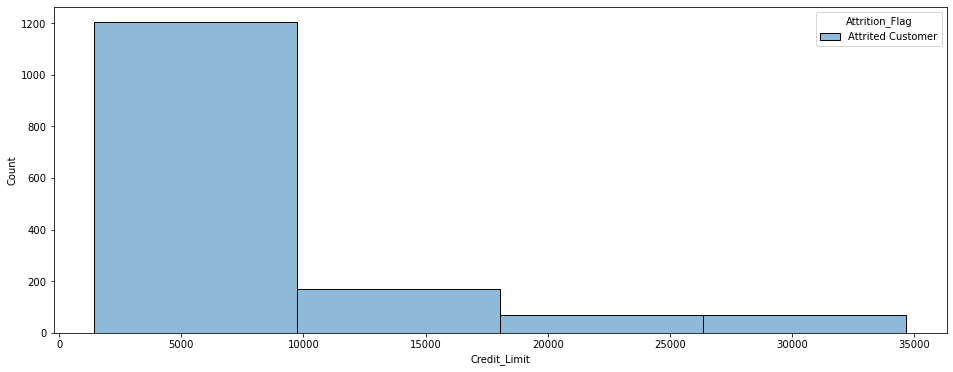

In [32]:
gc= df[(df['Card_Category']=='Blue') & (df['Attrition_Flag']=='Attrited Customer')]
gc

plt.figure(figsize = (16, 6))
sb.histplot(x=gc['Credit_Limit'], hue = gc["Attrition_Flag"], bins=4,color = 'green')

### The majority of Credit Limit is between 5000 to 15000 for the attrited customers

In [33]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,816,28,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,15476,117,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,8764,69,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,10291,60,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,8395,62,0.000


### T10 dependent count with respect to the customers who have churned out and the customers who are still using the services

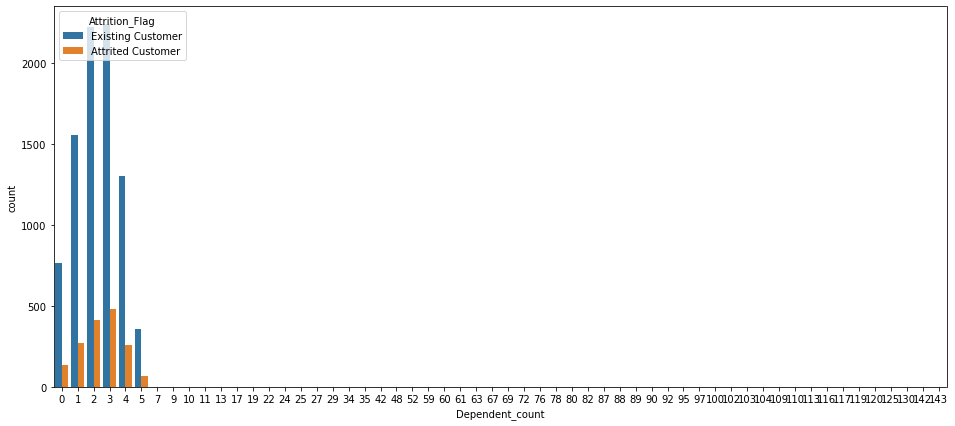

In [34]:
fig, ax = plt.subplots(figsize = (16, 7))
sb.countplot(x = "Dependent_count", hue = "Attrition_Flag", data = df)
plt.show()

### The highest no of customers are with atleast 2 to 3 Dependents as interpreted from the above graph

###  T11 relation between the credit limit and the attrition of the customers?

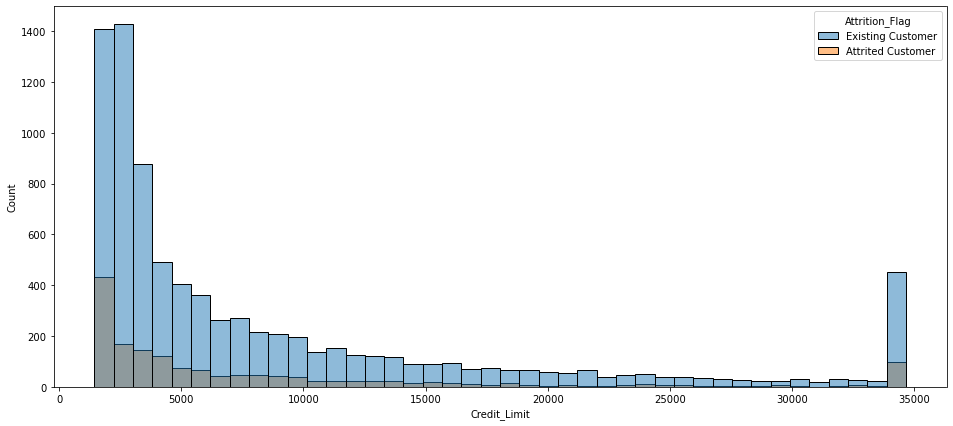

In [35]:
fig, ax = plt.subplots(figsize = (16, 7))
sb.histplot(x = "Credit_Limit", hue = "Attrition_Flag", data = df)
plt.show()

### Interpretation: As seen above, as the Credit Limit Increases, the Count of Customers is decreasing and vice versa

### T12 average utilization ratio of the credit card for each age sub-group between 40 and 50

<AxesSubplot:xlabel='Avg_Utilization_Ratio', ylabel='Count'>

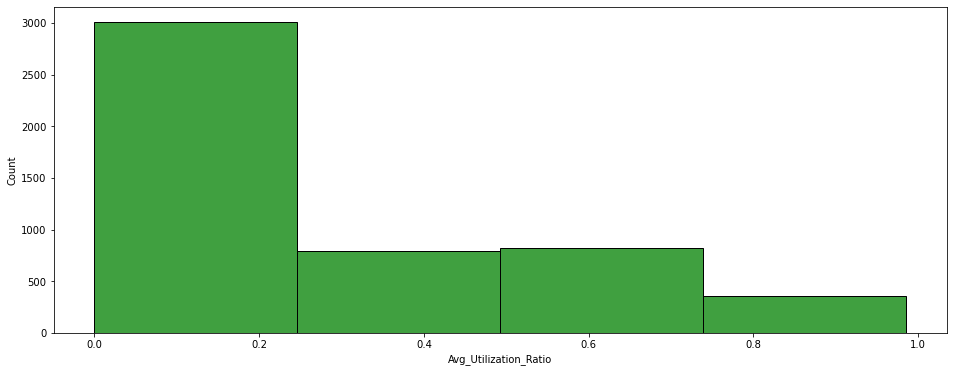

In [36]:
ga= df[(df['Customer_Age']>=40) & (df['Customer_Age']<=50)]
ga.head()

plt.figure(figsize = (16, 6))
sb.histplot(x=ga['Avg_Utilization_Ratio'],bins=4,color = 'green')

### Interpretation: The average utilization ratio is between 0.01 to 1.0 approx

### T13 How education level and income category affecting the customer churn?

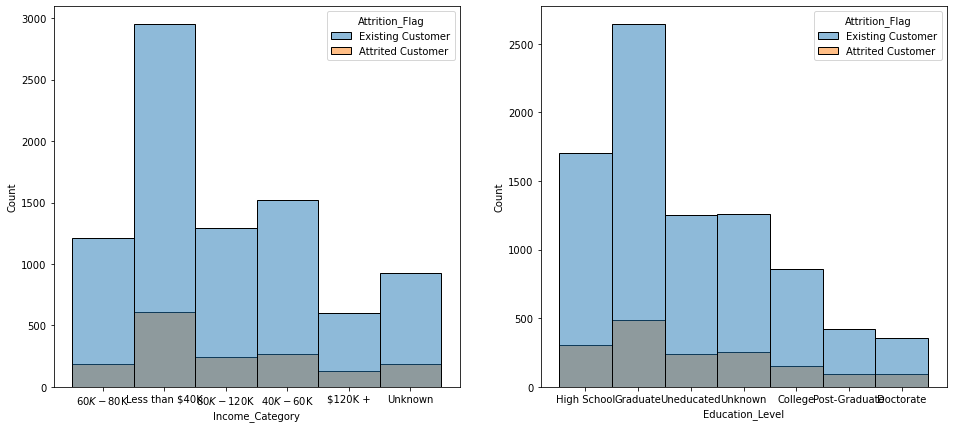

In [37]:
fig, ax = plt.subplots(1,2,figsize = (16, 7))
sb.histplot(x = "Income_Category", hue = "Attrition_Flag", data = df, ax=ax[0])
sb.histplot(x = "Education_Level", hue = "Attrition_Flag",data = df, ax = ax[1])
plt.show()

### As the Education level increases, the attrition level increases; As for the Income Category we can't interpret because it is fluctuating.

### T14 churned out customers with high income category, high education level, and high credit limit.

In [38]:
gb= df[(df['Credit_Limit']>=20000) & (df['Income_Category']=='Unknown') & (df['Education_Level']=='Doctorate') & (df['Attrition_Flag']=='Attrited Customer')]
gb

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
5599,713952558,Attrited Customer,53,F,3,Doctorate,Single,Unknown,Blue,43,3,3,2,34545.0,1474,316.0,2128,40,0.823


### The above customer has the highest education, highest income and has the highest credit limit.

### T15 relation between the attrition and the age of customers who have a lower utilization ratio?

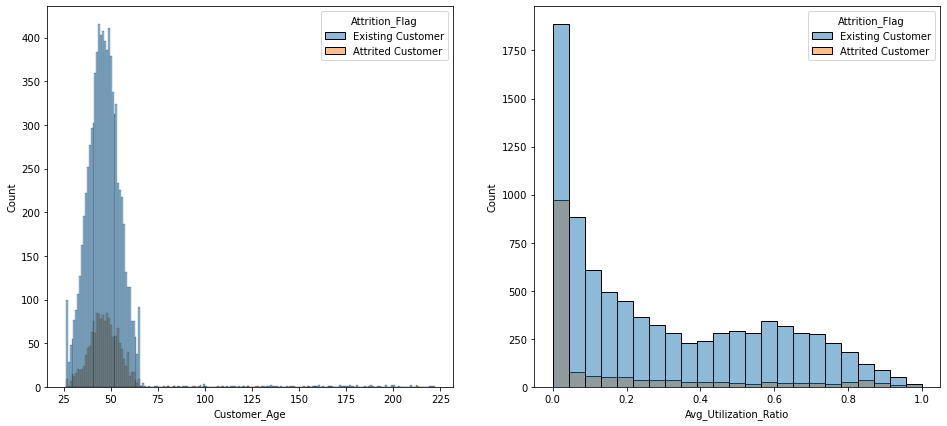

In [39]:
fig, ax = plt.subplots(1,2,figsize = (16, 7))
sb.histplot(x = "Customer_Age", hue = "Attrition_Flag", data = df, ax=ax[0])
sb.histplot(x = "Avg_Utilization_Ratio", hue = "Attrition_Flag",data = df, ax = ax[1])
plt.show()

### The left graph shows the relation between attrition and Age.
### The Right graph shows the relation between attrition and Average utilization ratio.

<AxesSubplot:xlabel='Avg_Utilization_Ratio', ylabel='Count'>

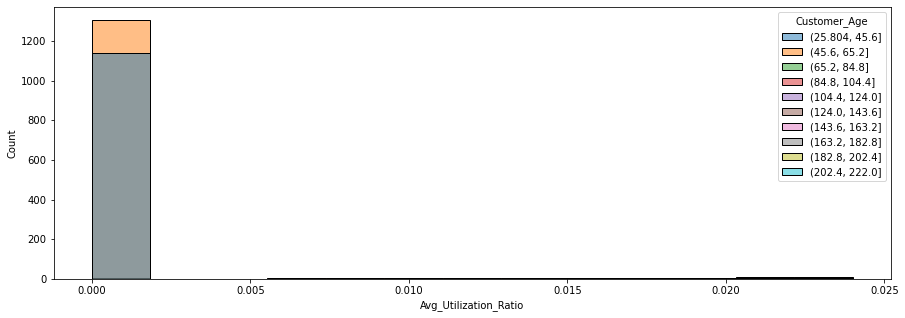

In [42]:
gf15=df[df.Avg_Utilization_Ratio<0.025]
plt.figure(figsize=(15,5))
bins=[0,10,20,30,40,50,60,70,80]
gf15_1= pd.cut(df['Customer_Age'],bins=10) 
sb.histplot(x=gf15["Avg_Utilization_Ratio"], hue=gf15_1)

###  T16 marital status and utilization ratio of the customers who are leaving out the bank versus those who are still with the bank

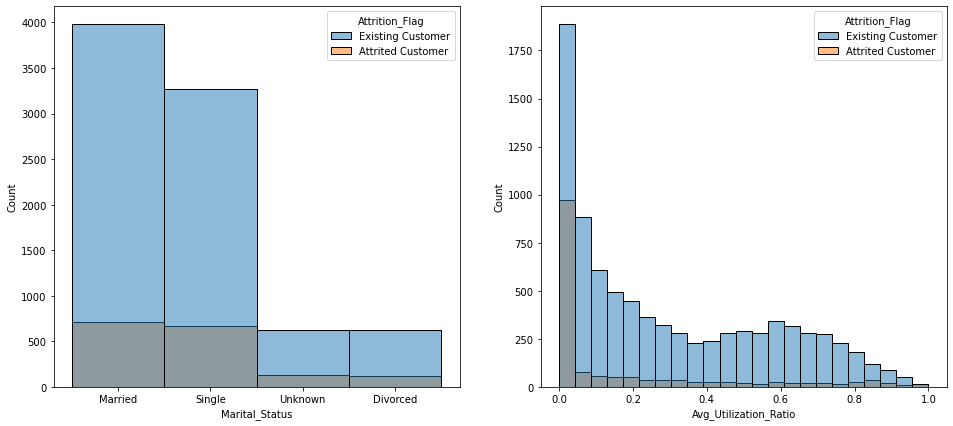

In [43]:
fig, ax = plt.subplots(1,2,figsize = (16, 7))
sb.histplot(x = "Marital_Status", hue = "Attrition_Flag", data = df, ax=ax[0])
sb.histplot(x = "Avg_Utilization_Ratio", hue = "Attrition_Flag",data = df, ax = ax[1])
plt.show()

### Interpretation: Majority of Customers are Married followed by Single as seen from the above graph

### T17 a relation between the credit limit offered to the customers (having a lower utilization ratio) compared to those who are having a higher utilization ratio?

In [44]:
gf17=df['Credit_Limit'].corr(df['Avg_Utilization_Ratio'])
gf17
corr_df=df.corr()

<AxesSubplot:>

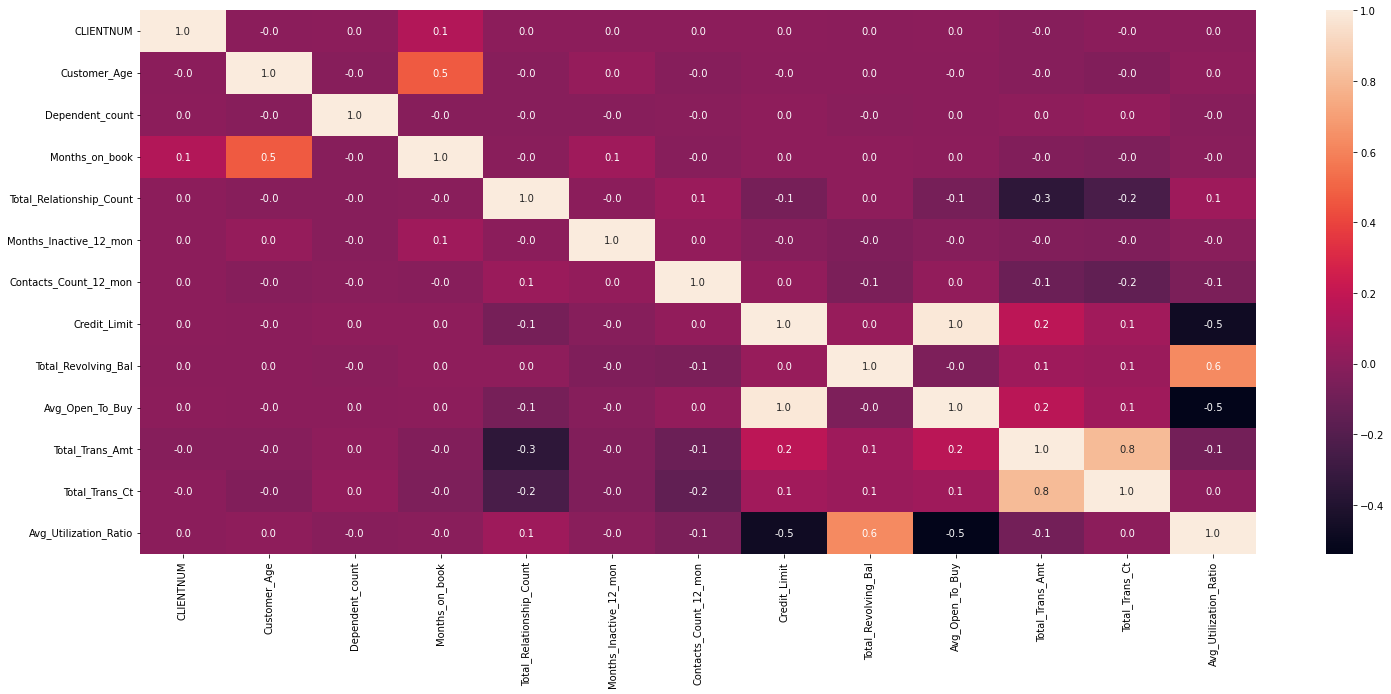

In [45]:
plt.figure(figsize=(25,10)) 
sb.heatmap(corr_df, annot=True, fmt=".1f")

### The above graph shows the relation between Credit limit and Avg Utilization Ratio